# Maximum Likelihood Estimation

##### Keywords: maximum likelihood,  parametric model, linear regression, logistic regression, inference,  exponential distribution

## Contents
{:.no_toc}
* 
{: toc}

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

$$
\newcommand{\Ex}{\mathbb{E}}
\newcommand{\Var}{\mathrm{Var}}
\newcommand{\Cov}{\mathrm{Cov}}
\newcommand{\SampleAvg}{\frac{1}{N({S})} \sum_{s \in {S}}}
\newcommand{\indic}{\mathbb{1}}
\newcommand{\avg}{\overline}
\newcommand{\est}{\hat}
\newcommand{\trueval}[1]{#1^{*}}
\newcommand{\Gam}[1]{\mathrm{Gamma}#1}
$$

$$
\renewcommand{\like}{\cal L}
\renewcommand{\loglike}{\ell}
\renewcommand{\err}{\cal E}
\renewcommand{\dat}{\cal D}
\renewcommand{\hyp}{\cal H}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{\mathbf x}
\renewcommand{\v}[1]{\mathbf #1}
$$

## Choosing a parametric model

When we do data analysis in a parametric way, we start by characterizing our particular sample statistically then, using a *probability distribution* (or mass function). This distribution has some parameters. Lets refer to these as $\theta$.

If we assume that our **data was generated** by this distribution, then the notion of the **true value** of the parameter makes sense. Now, usually in life, there is no way of knowing if this was the true generating process, unless we have some physics or similar ideas behind the process. But lets stick with the *myth* that we can do this. Then let us call the true value of the parameters as $\theta^*$.

To know this true value, we'd typically need the entire large population, not the sample we have been given as data. So the best we can do us to make a parameter estimate $\hat{\theta}$ from the data. In the context of frequentist statistics, the assumption is that the parameters are fixed, and that there is this true value ($\theta^*$), and that we can make some estimate of this from our sample ($\hat{\theta}$).

A distribution is induced on this estimate by considering many samples that could have been drawn from the population...remember that frequentist statistics fixes the parameters but considers data stochastic. This distribution is called the sampling distribution of the parameter $\theta$. (In general a sampling distribution can be considered for anything computed on the sample, such as a mean or variance or other moment).

Our question is: how do we estimate  $\hat{\theta}$. And how do we compute this sampling distribution so that we can get a notion of the uncertainty that estimating from a sample rather than the population leaves us with?

The first question is tackled by the Maximum Likelihood estimate, or MLE. The second one is tackled by techniques like the bootstrap.

Lets learn about the MLE in the context of a particular distribution, the exponential.

### The idea behind the MLE

The diagram below  illustrates the idea behind the MLE.

![](images/gaussmle.png)

Consider two distributions in the same family, one with a parameter, lets call it $\theta$, of value 1.8 (blue) and another of value 5.8. (green). Let's say we have 3 data points, at $x=1,2,3$.

Maximum likelihood starts by asking the question: conditional on the fixed value of $\theta$, which distribution is the data more likely to have come from?

In our case the blue is more likely since the product of the height of the 3 vertical blue bars is higher than that of the 3 green bars.

Indeed the question that MLE asks is: how can we move and scale the distribution, that is, change $\theta$, until the product of the 3 bars is maximised!

That is, the product 

$$
L(\lambda) = \prod_{i=1}^n P(x_i \mid \lambda)
$$

gives us a measure of how likely it is to observe values $x_1,...,x_n$ given the parameters $\lambda$. Maximum likelihood fitting consists of choosing the appropriate "likelihood" function $L=P(X \mid \lambda)$ to maximize for a given set of observations. How likely are the observations if the model is true?

Often it is easier and numerically more stable to maximise the log likelyhood:

$$
\ell(\lambda) = \sum_{i=1}^n ln(P(x_i \mid \lambda))
$$

The exponential distribution occurs naturally when describing the lengths of the inter-arrival times in a homogeneous Poisson process.

It takes the form:
$$
f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}
$$

In the case of the exponential distribution we have:

$$
\ell(lambda) = \sum_{i=1}^n ln(\lambda e^{-\lambda x_i}) = \sum_{i=1}^n \left( ln(\lambda) - \lambda x_i \right).
$$

Maximizing this:

$$
\frac{d \ell}{d\lambda} = \frac{n}{\lambda} - \sum_{i=1}^n x_i = 0
$$

and thus:

$$
\frac{1}{\est{\lambda_{MLE}}} = \frac{1}{n}\sum_{i=1}^n x_i,
$$

which is the sample mean of our sample. Usually one is not so lucky and one must use numerical optimization techniques.

A crucial property is that, for many commonly occurring situations, maximum likelihood parameter estimators have an approximate normal distribution when n is large. 

## Inference 

Just having an estimate is no good. We will want to put confidence intervals on the estimation of the parameters. This presents a conundrum: we have access to only one sample, but want to compute a error estimate over multiple samples, using an estimator such as the standard deviation.

At this point we are wishing for the Lord  to have given us other samples drawn from the population. But alas, no such luck...

So how then are we to find the sampling distribution of our parameters?

In the last two decades, **resampling** the ONE dataset we have has become computationally feasible. Resampling involves making new samples from the observations, each of which is analysed in the same way as out original dataset. One way to do this is the Bootstrap. 

##  Linear Regression MLE

Linear regression is the workhorse algorithm thats used in many sciences, social and natural. The diagram below illustrates the probabilistic interpretation of linear regression, and the idea behind the MLE for linear regression. We illustrate a point $(x_i, y_i)$, and the corresponding prediction  for $x_i$ using the line, that is $yhat_i$ or $\hat{y}_i$.

![](images/linregmle.png)

The fundamental assumption for the probabilistic analysis of linear regression is that each $y_i$ is gaussian distributed with mean  $\v{w}\cdot\v{x_i}$ (the y predicted by the regression line so to speak) and variance $\sigma^2$:

$$ y_i \sim N(\v{w}\cdot\v{x_i}, \sigma^2) .$$

We can then write the likelihood:

$$\cal{L} = p(\v{y} | \v{x}, \v{w}, \sigma) = \prod_i p(\v{y}_i | \v{x}_i, \v{w}, \sigma)$$

Given the canonical form of the gaussian:

$$N(\mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}} e^{-(y - \mu)^2 / 2\sigma^2},$$

we can show that:

$$\cal{L} =  (2\pi\sigma^2)^{(-n/2)} e^{\frac{-1}{2\sigma^2} \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2} .$$

The log likelihood $\ell$ then is given by:

$$\ell = \frac{-n}{2} log(2\pi\sigma^2) - \frac{1}{2\sigma^2}  \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2 .$$

If you differentiate this with respect to  $\v{w}$ and $\sigma$, you get the MLE values of the parameter estimates:

$$\v{w}_{MLE} = (\v{X}^T\v{X})^{-1} \v{X}^T\v{y}, $$

where $\v{X}$ is the design matrix created by stacking rows $\v{x}_i$, and

$$\sigma^2_{MLE} =  \frac{1}{n} \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2  . $$

These are the standard results of linear regression.

## Logistic Regression MLE

Logistic regression if one of the well known **supervized** learning algorithms used for classification.

The idea behind logistic regression is very simple. We want to draw a line in feature space that divides the '1' samples from the '0' samples, just like in the diagram above. In other words, we wish to find the "regression" line which divides the samples. Now, a line has the form $w_1 x_1 + w_2 x_2 + w_0 = 0$ in 2-dimensions. On one side of this line we have 

$$w_1 x_1 + w_2 x_2 + w_0 \ge 0,$$

and on the other side we have 

$$w_1 x_1 + w_2 x_2 + w_0 < 0.$$ 

Our classification rule then becomes:

$$
\begin{eqnarray}
y = 1 &if& \v{w}\cdot\v{x} \ge 0\\
y = 0 &if& \v{w}\cdot\v{x} < 0
\end{eqnarray}
$$

where $\v{x}$ is the vector $\{1,x_1, x_2,...,x_n\}$ where we have also generalized to more than 2 features.

What hypotheses $h$ can we use to achieve this? One way to do so is to use the **sigmoid** function:

$$h(z) = \frac{1}{1 + e^{-z}}.$$

Notice that at $z=0$ this function has the value 0.5. If $z > 0$, $h > 0.5$ and as $z \to \infty$, $h \to 1$. If $z < 0$, $h < 0.5$ and as $z \to -\infty$, $h \to 0$. As long as we identify any value of $y > 0.5$ as 1, and any $y < 0.5$ as 0, we can achieve what we wished above.

This function is plotted below:

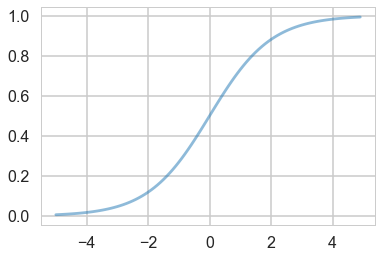

In [2]:
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);

So we then come up with our rule by identifying:

$$z = \v{w}\cdot\v{x}.$$

Then $h(\v{w}\cdot\v{x}) \ge 0.5$ if $\v{w}\cdot\v{x} \ge 0$ and $h(\v{w}\cdot\v{x}) \lt 0.5$ if $\v{w}\cdot\v{x} \lt 0$, and:

$$
\begin{eqnarray}
y = 1 &if& h(\v{w}\cdot\v{x}) \ge 0.5\\
y = 0 &if& h(\v{w}\cdot\v{x}) \lt 0.5.
\end{eqnarray}
$$

We said above that if $h > 0.5$ we ought to identify the sample with $y=1$? One way of thinking about this is to identify $h(\v{w}\cdot\v{x})$ with the probability that the sample is a '1' ($y=1$). Then we have the intuitive notion that lets identify a sample as 1 if we find that the probabilty of being a '1' is $\ge 0.5$.

So suppose we say then that the probability of $y=1$ for a given $\v{x}$ is given by $h(\v{w}\cdot\v{x})$?

Then, the conditional probabilities of $y=1$ or $y=0$ given a particular sample's features $\v{x}$ are:

$$\begin{eqnarray}
P(y=1 | \v{x}) &=& h(\v{w}\cdot\v{x}) \\
P(y=0 | \v{x}) &=& 1 - h(\v{w}\cdot\v{x}).
\end{eqnarray}$$

These two can be written together as

$$P(y|\v{x}, \v{w}) = h(\v{w}\cdot\v{x})^y \left(1 - h(\v{w}\cdot\v{x}) \right)^{(1-y)} $$

Then multiplying over the samples we get the probability of the training $y$ given $\v{w}$ and the $\v{x}$:

$$P(y|\v{x},\v{w}) = P(\{y_i\} | \{\v{x}_i\}, \v{w}) = \prod_{y_i \in \cal{D}} P(y_i|\v{x_i}, \v{w}) = \prod_{y_i \in \cal{D}} h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}$$

Why use probabilities? Earlier, we talked about how the regression function $f(x)$ never gives us the $y$ exactly, because of noise. This hold for classification too. Even with identical features, a different sample may be classified differently. 

We said that another way to think about a noisy $y$ is to imagine that our data $\dat$ was generated from  a joint probability distribution $P(x,y)$. Thus we need to model $y$ at a given $x$, written as $P(y \mid x)$, and since $P(x)$ is also a probability distribution, we have:

$$P(x,y) = P(y \mid x) P(x) ,$$

and can obtain our joint probability ($P(x, y))$.

Indeed its important to realize that a particular sample can be thought of as a draw from some "true" probability distribution. If for example the probability of classifying a sample point as a '0' was 0.1, and it turns out that the sample point was actually a '0', it does not mean that this model was necessarily wrong. After all, in roughly a 10th of the draws, this new sample would be classified as a '0'! But, of-course its more unlikely than its likely, and having good probabilities means that we'll be likely right most of the time, which is what we want to achieve in classification. 

Thus its desirable to have probabilistic, or at the very least, ranked models of classification where you can tell which sample is more likely to be classified as a '1'. 



Now if we maximize $$P(y \mid \v{x},\v{w})$$, we will maximize the chance that each point is classified correctly, which is what we want to do. This is a principled way of obtaining the highest probability classification. This **maximum likelihood** estimation maximises the **likelihood of the sample y**, 

$$\like = P(y \mid \v{x},\v{w}).$$ 


Again, we can equivalently maximize 

$$\loglike = log(P(y \mid \v{x},\v{w}))$$ 

since the natural logarithm $log$ is a monotonic function. This is known as maximizing the **log-likelihood**.


$$\loglike = log \like = log(P(y \mid \v{x},\v{w})).$$


Thus

$$\begin{eqnarray}
\loglike &=& log\left(\prod_{y_i \in \cal{D}} h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\right)\\
                  &=& \sum_{y_i \in \cal{D}} log\left(h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\right)\\                  
                  &=& \sum_{y_i \in \cal{D}} log\,h(\v{w}\cdot\v{x_i})^{y_i} + log\,\left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\\
                  &=& \sum_{y_i \in \cal{D}} \left ( y_i log(h(\v{w}\cdot\v{x})) + ( 1 - y_i) log(1 - h(\v{w}\cdot\v{x})) \right )
\end{eqnarray}$$